# **DOMAIN: Botanical research**

## 1. Loading and Understanding the data

In [ ]:
# Import required libraries

# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow
tensorflow.__version__

'2.9.2'

### Import the data.

In [ ]:
import os
os.chdir('/content/drive/MyDrive/flowers')

In [ ]:
# Extracting the images and storing it in a dataframe
import cv2

file_path = 'train' 
df = pd.DataFrame(columns=['file_name','class','image'])

In [ ]:
df

,file_name,class,image


In [ ]:
label = []
for i in os.listdir(file_path):
    if i != '.DS_Store': #This if condition is machine specific - can be ignored 
        label.append(i)
        print(i)
        for j in os.listdir(os.path.join(file_path,i)):
            img = cv2.imread(os.path.join(file_path,i,j))
            df = df.append({'file_name':j,'class':i,'image':img},ignore_index=True)

rose
dandelion
tulip
sunflower
daisy


In [ ]:
label1 = sorted(label)
label1

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [ ]:
df.loc[43]

file_name                         15190665092_5c1c37a066_m.jpg
class                                                     rose
image        [[[66, 142, 101], [68, 141, 101], [71, 143, 10...
Name: 43, dtype: object

In [ ]:
# Checking the dataframe
df.head()

,file_name,class,image
0,102501987_3cdb8e5394_n.jpg,rose,"[[[10, 16, 15], [17, 22, 21], [15, 17, 17], [4..."
1,10090824183_d02c613f10_m.jpg,rose,"[[[0, 15, 6], [0, 15, 6], [0, 17, 8], [3, 19, ..."
2,110472418_87b6a3aa98_m.jpg,rose,"[[[3, 0, 148], [0, 3, 138], [0, 3, 161], [0, 1..."
3,10894627425_ec76bbc757_n.jpg,rose,"[[[4, 18, 0], [24, 38, 20], [28, 39, 23], [27,..."
4,11233672494_d8bf0a3dbf_n.jpg,rose,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


### Analyze the dimensions of the data.

In [ ]:
# Checking the total number of images extracted

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3422 entries, 0 to 3421
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  3422 non-null   object
 1   class      3422 non-null   object
 2   image      3422 non-null   object
dtypes: object(3)
memory usage: 80.3+ KB


In [ ]:
df["file_name"].shape

(3422,)

In [ ]:
df["class"].shape

(3422,)

In [ ]:
df["image"].shape

(3422,)

### Check for missing values and print percentage for each attribute.

In [ ]:
df.isnull().sum() #displays number of null values in each column

file_name    0
class        0
image        0
dtype: int64

In [ ]:
df.isnull().sum()/(len(df))*100 #displays the percentage of null values of each column

file_name    0.0
class        0.0
image        0.0
dtype: float64

There are no missing values in the dataset

### Visualize the data.

In [ ]:
# Vizualizing the images

def sample_img(df,n):
    df = df.sample(n)
    plt.figure(figsize=(20,20))
    for i,j in enumerate(df.iterrows()):
        plt.subplot(1,n,i+1)
        plt.imshow(j[1]['image'])
        plt.title("{}".format(j[1]['class'])) 

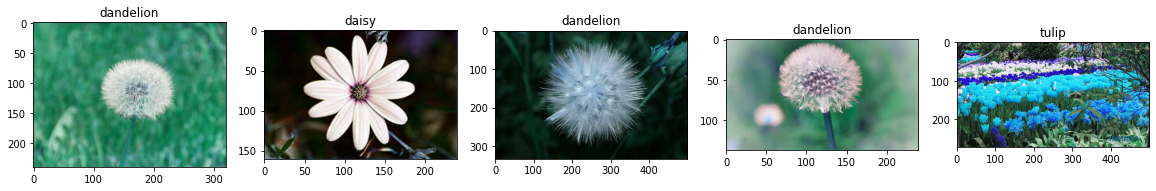

In [ ]:
sample_img(df, 5)

## 2. Data Preparation

### Split the dataset into train and validation. (suggestion: keep the test folder for final validation)

In [ ]:
# Creating X_train and y_train

X_train = df['image']
Y_train = df['class']

print(X_train.shape)
print(Y_train.shape)

(3422,)
(3422,)


In [ ]:
from sklearn.model_selection import train_test_split 
X_train2, X_val, Y_train2, Y_val = train_test_split(X_train, Y_train, test_size = 0.3, random_state =42)

In [ ]:
X_train2.shape,X_val.shape,Y_train2.shape,Y_val.shape

((2395,), (1027,), (2395,), (1027,))

In [ ]:
# Reshaping X_train suitable for the model

import cv2
X_train_tr = []

for i, j in enumerate(X_train2):
    img = cv2.resize(j, (128, 128))
    X_train_tr.append(img)
    

In [ ]:
X_train_trn = np.array(X_train_tr)
X_train_trn.shape

(2395, 128, 128, 3)

In [ ]:
# Reshaping X_train suitable for the model - validation set

import cv2
X_val_vl = []

for i, j in enumerate(X_val):
    img = cv2.resize(j, (128, 128))
    X_val_vl.append(img)

X_val_vld = np.array(X_val_vl)
X_val_vld.shape

(1027, 128, 128, 3)

### One hot encode the target variable.

In [ ]:
# Convert your target feature to one-hot vectors

y_train_onehot = pd.get_dummies(Y_train2)
y_val_onehot = pd.get_dummies(Y_val)


print("Shape of y_train:", y_train_onehot.shape)
print("One value of y_train:", y_train_onehot)

Shape of y_train: (2395, 5)
One value of y_train:       daisy  dandelion  rose  sunflower  tulip
1714      0          0     0          0      1
2780      1          0     0          0      0
2883      1          0     0          0      0
994       0          1     0          0      0
464       0          0     1          0      0
...     ...        ...   ...        ...    ...
1095      0          1     0          0      0
1130      0          1     0          0      0
1294      0          1     0          0      0
860       0          1     0          0      0
3174      1          0     0          0      0

[2395 rows x 5 columns]


### Normalize the data.

In [ ]:
# Normalizing the X_train and X_val

X_train_trnn = (X_train_trn/255).astype('float32')
X_val_vldd = (X_val_vld/255).astype('float32')

In [ ]:
# Trying to check the max and min values

print("Max and Min value in X_train:", X_train_trnn.max(), X_train_trnn.min())
print("Max and Min value in X_test:", X_val_vldd.max(), X_val_vldd.min())

Max and Min value in X_train: 1.0 0.0
Max and Min value in X_test: 1.0 0.0


In [ ]:
df.loc[700]

file_name                         16911008669_ea21fd8915_n.jpg
class                                                dandelion
image        [[[16, 74, 63], [20, 76, 63], [26, 80, 67], [2...
Name: 700, dtype: object

# 3. Train, tune, test, and Compare Deep Learning image classifier model using:

### Use CNN for Training.

In [ ]:
# Initializing basic CNN model

from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras.models import Sequential


model = Sequential()
model.add(Conv2D(filters=128, kernel_size=3, activation="relu", input_shape=(128, 128, 3)))
model.add(Conv2D(filters=128, kernel_size=3, activation="relu"))
model.add(Conv2D(filters=64, kernel_size=3, activation="relu"))
model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(5, activation="softmax"))


# Compile the model
model.compile(loss="categorical_crossentropy", 
              metrics=["accuracy"], 
              optimizer="adam")

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 128)     3584      
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 128)     147584    
                                                                 
 conv2d_2 (Conv2D)           (None, 122, 122, 64)      73792     
                                                                 
 conv2d_3 (Conv2D)           (None, 120, 120, 32)      18464     
                                                                 
 flatten (Flatten)           (None, 460800)            0         
                                                                 
 dense (Dense)               (None, 64)                29491264  
                                                                 
 dense_1 (Dense)             (None, 128)               8

In [ ]:
tr_history = model.fit(x=X_train_trnn, 
                       y=y_train_onehot, 
                       batch_size=32, 
                       epochs=20, 
                       validation_data=(X_val_vldd, y_val_onehot))

Epoch 1/20
75/75 [==============================] - 21s 217ms/step - loss: 1.7433 - accuracy: 0.2635 - val_loss: 1.5966 - val_accuracy: 0.2814
Epoch 2/20
75/75 [==============================] - 13s 174ms/step - loss: 1.5910 - accuracy: 0.2768 - val_loss: 1.5924 - val_accuracy: 0.2814
Epoch 3/20
75/75 [==============================] - 14s 186ms/step - loss: 1.5880 - accuracy: 0.2768 - val_loss: 1.5933 - val_accuracy: 0.2814
Epoch 4/20
75/75 [==============================] - 13s 174ms/step - loss: 1.5878 - accuracy: 0.2768 - val_loss: 1.5938 - val_accuracy: 0.2814
Epoch 5/20
75/75 [==============================] - 13s 174ms/step - loss: 1.5809 - accuracy: 0.2752 - val_loss: 1.5888 - val_accuracy: 0.2814
Epoch 6/20
75/75 [==============================] - 14s 185ms/step - loss: 1.5847 - accuracy: 0.2852 - val_loss: 1.5452 - val_accuracy: 0.2853
Epoch 7/20
75/75 [==============================] - 13s 174ms/step - loss: 1.5218 - accuracy: 0.3127 - val_loss: 1.6115 - val_accuracy: 0.3048

In [ ]:
model.evaluate(X_val_vldd, y_val_onehot)

33/33 [==============================] - 2s 54ms/step - loss: 6.6517 - accuracy: 0.3671


[6.651703834533691, 0.3670886158943176]

Text(0.5, 1.0, 'Training and validation loss')

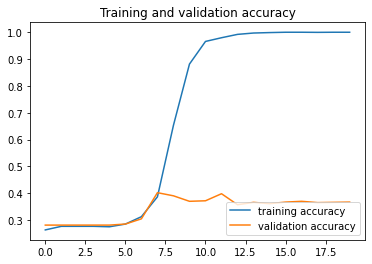

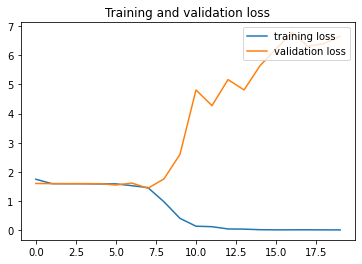

In [ ]:
## Accuracy and Loss plots

accuracy      = tr_history.history['accuracy']
val_accuracy  = tr_history.history['val_accuracy']
loss     = tr_history.history['loss']
val_loss = tr_history.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

- The model is overfitting as the training accuracy has increased to 0.9996 while the testing accuracy decreased to 0.3671. 
Although, the training loss decreased significantly but the validation loss increased to a very high value which means the model is not properly trained.

In [ ]:
# Saving the model
model.save('cnn_transfer.h5')
model.save_weights('cnn_tr_weights.h5')

### Use various CNN with transferred learning models for training.
# VGG16

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model = VGG16(input_shape=X_train_trnn[0].shape,
                   weights='imagenet',
                   include_top=False) #imports the VGG16 model and discards the last 1000 neuron layer.

x = base_model.output
x = GlobalAveragePooling2D()(x) # Optional
x = Dense(1024, activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x = Dense(512, activation='relu')(x) #dense layer 2
x = Dense(256, activation='relu')(x) #dense layer 3
preds = Dense(5, activation='softmax')(x) #final layer with softmax activation

model_vgg16 = Model(inputs=base_model.input,
                    outputs=preds)

# set the first 20 layers of the network to be non-trainable
for layer in model_vgg16.layers[:20]:
    layer.trainable=False
for layer in model_vgg16.layers[20:]:
    layer.trainable=True

# Compile the model
model_vgg16.compile(optimizer='Adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

model_vgg16.summary()

58889256/58889256 [==============================] - 3s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                              

In [ ]:
tr_history2 = model_vgg16.fit(x=X_train_trnn, 
                              y=y_train_onehot, 
                              batch_size=64, 
                              epochs=30, 
                              validation_data=(X_val_vldd, y_val_onehot))

Epoch 1/30
38/38 [==============================] - 11s 208ms/step - loss: 1.1035 - accuracy: 0.5649 - val_loss: 0.7172 - val_accuracy: 0.7352
Epoch 2/30
38/38 [==============================] - 5s 145ms/step - loss: 0.6717 - accuracy: 0.7428 - val_loss: 0.6112 - val_accuracy: 0.7712
Epoch 3/30
38/38 [==============================] - 6s 146ms/step - loss: 0.5510 - accuracy: 0.7900 - val_loss: 0.6090 - val_accuracy: 0.7848
Epoch 4/30
38/38 [==============================] - 6s 147ms/step - loss: 0.4629 - accuracy: 0.8317 - val_loss: 0.6266 - val_accuracy: 0.7731
Epoch 5/30
38/38 [==============================] - 6s 148ms/step - loss: 0.4228 - accuracy: 0.8443 - val_loss: 0.5513 - val_accuracy: 0.7955
Epoch 6/30
38/38 [==============================] - 6s 148ms/step - loss: 0.3593 - accuracy: 0.8693 - val_loss: 0.6661 - val_accuracy: 0.7790
Epoch 7/30
38/38 [==============================] - 6s 148ms/step - loss: 0.3176 - accuracy: 0.8881 - val_loss: 0.5267 - val_accuracy: 0.8072
Epoch

Text(0.5, 1.0, 'Training and validation loss')

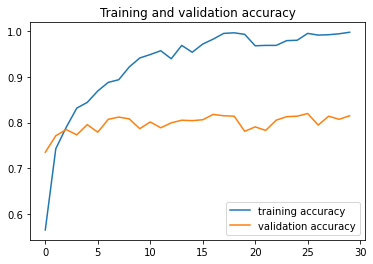

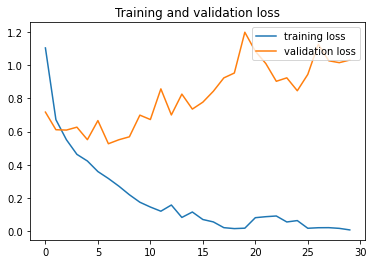

In [ ]:
## Accuracy and Loss plots

accuracy = tr_history2.history['accuracy']
val_accuracy = tr_history2.history['val_accuracy']
loss = tr_history2.history['loss']
val_loss = tr_history2.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

- The VGG16 model gave better results than the one without transfer learning. Here, the model accuracy is much better than the normal CNN model. Also, the validation loss is fluctuating a lot but its ultimate value is reduced than the previous model.

In [ ]:
# Saving model weights

model_vgg16.save('vgg16.h5')
model_vgg16.save_weights('vgg16_weights.h5')

# VGG19

In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model = VGG19(input_shape=X_train_trnn[0].shape,
                   weights='imagenet',
                   include_top=False) #imports the VGG16 model and discards the last 1000 neuron layer.

x = base_model.output
x = GlobalAveragePooling2D()(x) # Optional
x = Dense(1024, activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x = Dense(512, activation='relu')(x) #dense layer 2
x = Dense(256, activation='relu')(x) #dense layer 3
preds = Dense(5, activation='softmax')(x) #final layer with softmax activation

model_vgg19 = Model(inputs=base_model.input,
                    outputs=preds)

# set the first 20 layers of the network to be non-trainable
for layer in model_vgg19.layers[:20]:
    layer.trainable=False
for layer in model_vgg19.layers[20:]:
    layer.trainable=True

# Compile the model
model_vgg19.compile(optimizer='Adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

model_vgg19.summary()

80134624/80134624 [==============================] - 4s 0us/step
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                            

In [ ]:
tr_history3 = model_vgg19.fit(x=X_train_trnn, 
                              y=y_train_onehot, 
                              batch_size=64, 
                              epochs=30, 
                              validation_data=(X_val_vldd, y_val_onehot))

Epoch 1/30
38/38 [==============================] - 9s 204ms/step - loss: 0.9792 - accuracy: 0.6154 - val_loss: 0.6230 - val_accuracy: 0.7692
Epoch 2/30
38/38 [==============================] - 7s 175ms/step - loss: 0.5028 - accuracy: 0.8100 - val_loss: 0.5858 - val_accuracy: 0.7887
Epoch 3/30
38/38 [==============================] - 7s 176ms/step - loss: 0.3864 - accuracy: 0.8589 - val_loss: 0.4900 - val_accuracy: 0.8267
Epoch 4/30
38/38 [==============================] - 7s 177ms/step - loss: 0.2792 - accuracy: 0.9002 - val_loss: 0.5915 - val_accuracy: 0.7868
Epoch 5/30
38/38 [==============================] - 7s 177ms/step - loss: 0.2077 - accuracy: 0.9190 - val_loss: 0.5203 - val_accuracy: 0.8315
Epoch 6/30
38/38 [==============================] - 7s 176ms/step - loss: 0.1183 - accuracy: 0.9591 - val_loss: 0.6721 - val_accuracy: 0.8208
Epoch 7/30
38/38 [==============================] - 7s 175ms/step - loss: 0.1163 - accuracy: 0.9608 - val_loss: 0.8029 - val_accuracy: 0.8043
Epoch 

Text(0.5, 1.0, 'Training and validation loss')

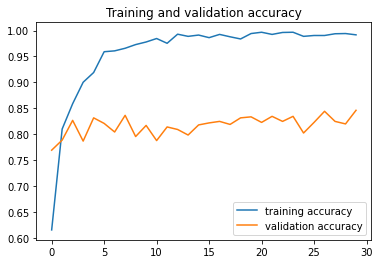

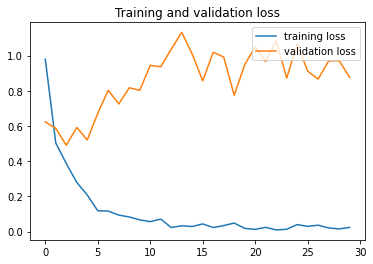

In [ ]:
## Accuracy and Loss plots

accuracy = tr_history3.history['accuracy']
val_accuracy = tr_history3.history['val_accuracy']
loss = tr_history3.history['loss']
val_loss = tr_history3.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

- The VGG19 model is giving better results than the VGG16 model with a testing accuracy of 0.8462

In [ ]:
# Saving model and its weights for future use

model_vgg19.save('vgg19.h5')
model_vgg19.save_weights('vgg19_weights.h5')

# Resnet50

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model = ResNet50(input_shape=X_train_trnn[0].shape,
                      weights='imagenet',
                      include_top=False) #imports the ResNet50 model and discards the last 1000 neuron layer.

x = base_model.output
x = GlobalAveragePooling2D()(x) # Optional
#x = Dense(1024, activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
#x = Dense(512, activation='relu')(x) #dense layer 2
x = Dense(256, activation='relu')(x) #dense layer 3
preds = Dense(5, activation='softmax')(x) #final layer with softmax activation

model_resnet50 = Model(inputs=base_model.input,
                       outputs=preds)

# set the first 150 layers of the network to be non-trainable
for layer in model_resnet50.layers[:150]:
    layer.trainable=False
for layer in model_resnet50.layers[150:]:
    layer.trainable=True

# Compile the model
model_resnet50.compile(optimizer=tensorflow.optimizers.Adam(learning_rate=1e-5),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

model_resnet50.summary()

94765736/94765736 [==============================] - 5s 0us/step
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalizati

In [ ]:
tr_history4 = model_resnet50.fit(x=X_train_trnn, 
                                 y=y_train_onehot, 
                                 batch_size=8, 
                                 epochs=30, 
                                 validation_data=(X_val_vldd, y_val_onehot))

Epoch 1/30
300/300 [==============================] - 16s 37ms/step - loss: 1.3976 - accuracy: 0.4209 - val_loss: 1.3845 - val_accuracy: 0.4430
Epoch 2/30
300/300 [==============================] - 10s 34ms/step - loss: 1.1467 - accuracy: 0.5620 - val_loss: 1.1620 - val_accuracy: 0.5346
Epoch 3/30
300/300 [==============================] - 10s 32ms/step - loss: 0.9943 - accuracy: 0.6251 - val_loss: 1.1103 - val_accuracy: 0.5716
Epoch 4/30
300/300 [==============================] - 10s 34ms/step - loss: 0.8779 - accuracy: 0.6752 - val_loss: 1.1575 - val_accuracy: 0.5550
Epoch 5/30
300/300 [==============================] - 10s 34ms/step - loss: 0.7577 - accuracy: 0.7336 - val_loss: 1.0927 - val_accuracy: 0.5891
Epoch 6/30
300/300 [==============================] - 10s 34ms/step - loss: 0.6567 - accuracy: 0.7770 - val_loss: 1.1124 - val_accuracy: 0.5823
Epoch 7/30
300/300 [==============================] - 11s 35ms/step - loss: 0.5889 - accuracy: 0.8100 - val_loss: 1.1254 - val_accuracy:

Text(0.5, 1.0, 'Training and validation loss')

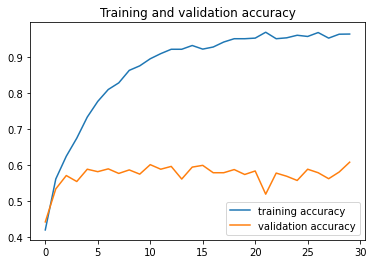

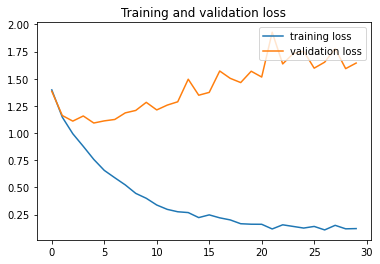

In [ ]:
## Accuracy and Loss plots

accuracy = tr_history4.history['accuracy']
val_accuracy = tr_history4.history['val_accuracy']
loss = tr_history4.history['loss']
val_loss = tr_history4.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

- This model is giving poorer results than VGG19 model.

In [ ]:
# Saving model and its weights for future use

model_resnet50.save('resnet50.h5')
model_resnet50.save_weights('resnet50_weights.h5')

# MobileNet

In [ ]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

base_model = MobileNet(input_shape=X_train_trnn[0].shape,
                       weights='imagenet',
                       include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x = base_model.output
x = GlobalAveragePooling2D()(x) # Optional
x = Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x = Dense(512,activation='relu')(x) #dense layer 2
x = Dense(256,activation='relu')(x) #dense layer 3
preds = Dense(5,activation='softmax')(x) #final layer with softmax activation

model_mobilenet = Model(inputs=base_model.input,
                        outputs=preds)

# set the first 20 layers of the network to be non-trainable
for layer in model_mobilenet.layers[:20]:
    layer.trainable=False
for layer in model_mobilenet.layers[20:]:
    layer.trainable=True

# Compile the model
model_mobilenet.compile(optimizer='Adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

model_mobilenet.summary()

17225924/17225924 [==============================] - 2s 0us/step
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 64, 64, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 64, 64, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 64, 64, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 64, 64, 32)       128  

In [ ]:
# Model with the non-trainable first 20 layers 

tr_history5 = model_mobilenet.fit(x=X_train_trnn, 
                                  y=y_train_onehot, 
                                  batch_size=64, 
                                  epochs=30, 
                                  validation_data=(X_val_vldd, y_val_onehot))

Epoch 1/30
38/38 [==============================] - 7s 106ms/step - loss: 0.6976 - accuracy: 0.7553 - val_loss: 3.3367 - val_accuracy: 0.5287
Epoch 2/30
38/38 [==============================] - 3s 73ms/step - loss: 0.2905 - accuracy: 0.9102 - val_loss: 4.8223 - val_accuracy: 0.4060
Epoch 3/30
38/38 [==============================] - 3s 72ms/step - loss: 0.1945 - accuracy: 0.9332 - val_loss: 3.3584 - val_accuracy: 0.5998
Epoch 4/30
38/38 [==============================] - 3s 72ms/step - loss: 0.1503 - accuracy: 0.9461 - val_loss: 2.5663 - val_accuracy: 0.6173
Epoch 5/30
38/38 [==============================] - 3s 72ms/step - loss: 0.1511 - accuracy: 0.9570 - val_loss: 1.0154 - val_accuracy: 0.7887
Epoch 6/30
38/38 [==============================] - 3s 73ms/step - loss: 0.1610 - accuracy: 0.9520 - val_loss: 1.2263 - val_accuracy: 0.7225
Epoch 7/30
38/38 [==============================] - 3s 79ms/step - loss: 0.1512 - accuracy: 0.9658 - val_loss: 0.7172 - val_accuracy: 0.8179
Epoch 8/30
3

Text(0.5, 1.0, 'Training and validation loss')

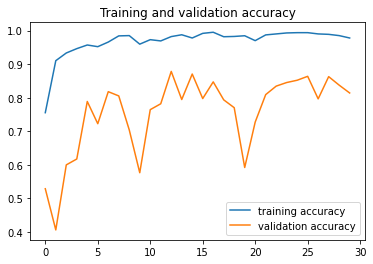

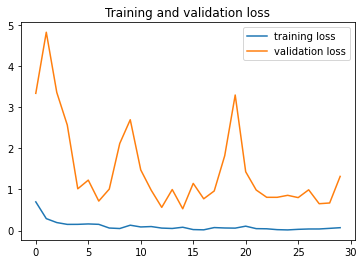

In [ ]:
## Accuracy and Loss plots

accuracy = tr_history5.history['accuracy']
val_accuracy = tr_history5.history['val_accuracy']
loss = tr_history5.history['loss']
val_loss = tr_history5.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  (epochs, accuracy, label = 'training accuracy')
plt.plot  (epochs, val_accuracy, label = 'validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss')
plt.plot  (epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss')

- This model is giving better results than Resnet50 but poorer results than VGG19 with a validation accuracy of 0.8140.

In [ ]:
# Saving model and its weights for future use

model_mobilenet.save('mobilenet.h5')
model_mobilenet.save_weights('mobilenet_weights.h5')

### Save the best model.

- The VGG19 model is giving the best results with a testing accuracy of 0.8462

### Compare the results from the above steps and write your detailed observations.

We have used the following transfer learning models to train our image classification model of flowers - 

- VGG16
- VGG19
- Resnet50
- MobileNet

Out of these, VGG19 performed the best with a testing accuracy of 0.8462 and the validation loss is also significantly reduced which was not observed for the other models. In this model, the overfitting is also reduced to a great extent and hence this model is being chosen as the best model.

### Load the best fitted model and make the predictions on a test image.

In [ ]:
from tensorflow.keras.models import load_model

# Loading MobileNet
model_vgg19 = load_model('vgg19.h5')


In [ ]:
#Preprocessing the test data before prediction
X_test = []
y_test = []
f_labels = []
height = 128
width = 128

for i in os.listdir(os.path.join('test')):
    if i !='.DS_Store':
        f_labels.append(i)
        for j in os.listdir(os.path.join('test', i)):
            if j != '.DS_Store':
                image = cv2.imread(os.path.join('test', i, j))
                image = cv2.resize(image, (height, width))
                X_test.append(image)
                y_test.append(i)

print(f_labels)
X_test_array = np.array(X_test)

['dandelion', 'rose', 'daisy', 'tulip', 'sunflower']


128
VGG19
1/1 [==============================] - 0s 17ms/step
Softmax Outputs: [[1. 0. 0. 0. 0.]]
0
1.0
Predicted_Label_VGG19: dandelion
1
0.0
2
0.0
3
0.0
4
0.0


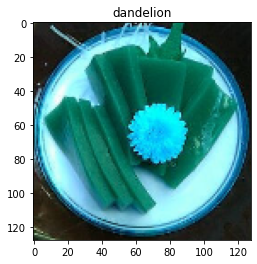

In [ ]:
# Predicting and vizualizing the test image using pretrained Models

import matplotlib.pyplot as plt
%matplotlib inline

n = 50
plt.title(y_test[n])
plt.imshow(X_test[n])
print(X_test[n].shape[0])

# VGG19
print('VGG19')

y_pred_vgg19 = model_vgg19.predict(X_test[n].reshape(1, 128, 128, 3))
print("Softmax Outputs:", y_pred_vgg19)



# Convert the predicted probabilities to labels
for i in y_pred_vgg19:
    for j,k in enumerate(i):
        print(j)
        print(k)
        if k == y_pred_vgg19.max():
           print('Predicted_Label_VGG19:', f_labels[j]) #Map the predicted label with 0-4 later
